In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Figure 1: Different learning regimes

In [12]:
base_dir = 'experiments'

def load_experiment_df(filename):
    return pd.read_csv(filename, dtype={'episode': int}, index_col=0)

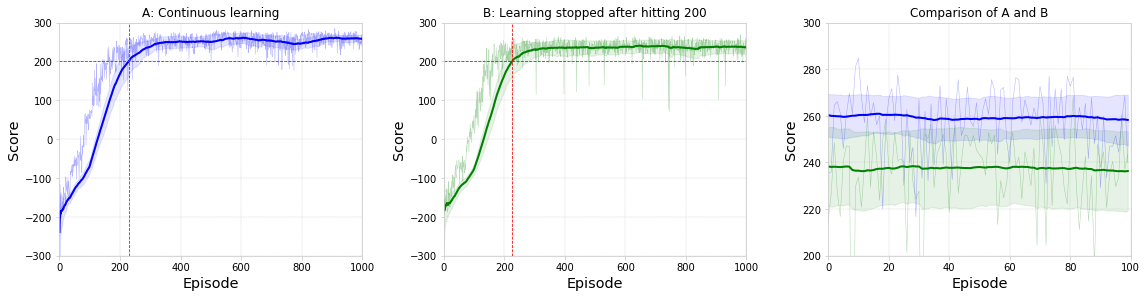

In [639]:
def plot_experiment(df, ax, color, alpha_score=0.3, alpha_std=0.1, show_vline=True, show_hline=True, label=None):
    if 'score_mean' in df.columns:
        ax.plot(df[['score_mean']], color=color, linewidth=0.5, alpha=alpha_score)
        ax.plot(df[['average_mean']], color=color, linewidth=2, label=label)
        ax.fill_between(df.index, df['average_mean'], df['average_mean'] + df['average_std'], color=color, alpha=alpha_std)
        ax.fill_between(df.index, df['average_mean'], df['average_mean'] - df['average_std'], color=color, alpha=alpha_std)
        if show_hline:
            ax.axhline(200, color='red', linewidth=0.8, linestyle='--')
        if df[df['average_mean'] > 200].shape[0] > 0 and show_vline:
            ax.axvline(df[df['average_mean'] > 200].iloc[0].name, color='red', linewidth=0.8, linestyle='--')
    else:
        ax.plot(df[['score']], linewidth=0.5)
        ax.plot(df[['average']], color=color, linewidth=2)
        if show_hline:
            ax.axhline(200, color='red', linewidth=0.8, linestyle='--')
        if df[df['average'] > 200].shape[0] > 0 and show_vline:
            ax.axvline(df[df['average'] > 200].iloc[0].name, color='red', linewidth=0.8, linestyle='--')
            
def format_axis(ax, xlabel='Episode', ylabel='Score'):
    ax.set_xlabel(xlabel, size='x-large')
    ax.set_ylabel(ylabel, size='x-large')
    ax.tick_params(axis='both', which='major', labelsize=10)

    ax.grid(b=True, which='major', color='#cccccc', linewidth=0.4, linestyle='--')
    #ax.set_facecolor('#f9f9f9')
    _ = plt.setp(ax.spines.values(), color='#cccccc')
    _ = plt.setp([ax.get_xticklines(), ax.get_yticklines()], color='#cccccc')

    
dfA = load_experiment_df(f'{base_dir}/e1b/df_A.csv')
dfB = load_experiment_df(f'{base_dir}/e1_final/df_A.csv')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
plot_experiment(dfA, ax1, 'blue')
plot_experiment(dfB, ax2, 'green')

dfA1 = dfA[-100:]
dfA1.index = range(100)
dfA1.index.name = 'episode'
#dfA1 = load_experiment_df(f'{base_dir}/e1b/df_A_test.csv')

dfB1 = dfB[-100:]
dfB1.index = range(100)
dfB1.index.name = 'episode'

plot_experiment(dfA1, ax3, 'blue', show_vline=False) #, alpha_score=0)
plot_experiment(dfB1, ax3, 'green', show_vline=False) #, alpha_score=0)

format_axis(ax1)
format_axis(ax2)
format_axis(ax3)

#ax.set_xlim(0, df[df['average_mean'] > 200].iloc[0].name + 100)
ax1.set_xlim(0, 1000)
ax2.set_xlim(0, 1000)
ax3.set_xlim(0, 100)
ax3.set_ylim(200, 300)
ax1.set_ylim(-300, 300)
ax2.set_ylim(-300, 300)

ax1.set_title('A: Continuous learning')
ax2.set_title('B: Learning stopped after hitting 200')
ax3.set_title('Comparison of A and B')

plt.subplots_adjust(left=0.05, right=0.98, top=0.93, bottom=0.12,
                            wspace=0.27)

plt.savefig('paper/images/fig1.png')
#font = {'color':  'gray', 'weight': 'normal', 'size': 120, 'alpha': 0.2}
#_ = fig.text(0.15, 0.6, 'Carlos Souza', fontdict=font)

In [648]:
dfB1['average_mean'].mean()

237.52281857863275

## Figure 2: Different agents

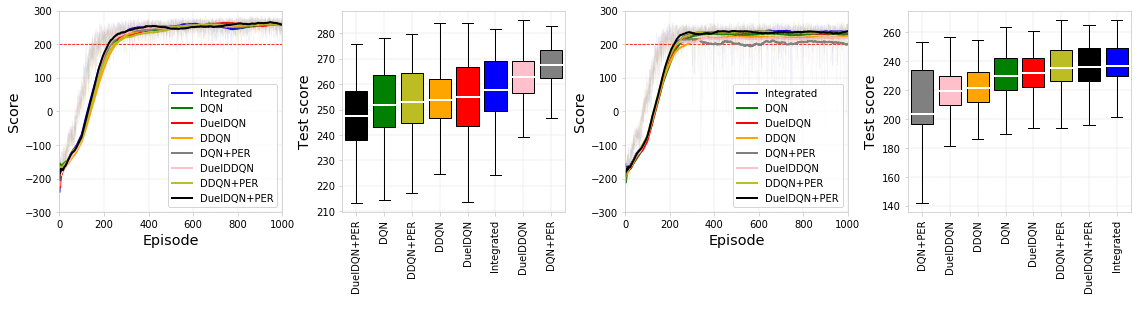

In [715]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

def plot_learning_regime(axA, axB, regime='continuous'):
    colors = ['blue', 'green', 'red', 'orange', 'grey', 'pink', 'tab:olive', 'black']
    frames = []
    means = []
    labels = ['Integrated', 'DQN', 'DuelDQN', 'DDQN', 'DQN+PER', 'DuelDDQN', 'DDQN+PER', 'DuelDQN+PER']
    for i, eid in enumerate(string.ascii_letters[0:8].upper()):
        if regime == 'continuous':
            df = load_experiment_df(f'{base_dir}/e1b_final/df_{eid}.csv')
            df_test = load_experiment_df(f'{base_dir}/e1b_final/df_{eid}_test.csv')
        else:
            df = load_experiment_df(f'{base_dir}/e1_final/df_{eid}.csv')
            df_test = load_experiment_df(f'{base_dir}/e1_final/df_{eid}.csv')[-200:]
            
        plot_experiment(df, axA, colors[i], alpha_score=0.05, alpha_std=0, show_vline=False, label=labels[i],
                        show_hline=True if i == 0 else False)
        frames.append(df_test['score_mean'])
        means.append(df_test['score_mean'].mean())

    sorted_frames = [x for _,x in sorted(zip(means, frames))]
    sorted_labels = [x for _,x in sorted(zip(means, labels))]
    sorted_colors = [x for _,x in sorted(zip(means, colors))]
    bp = axB.boxplot(sorted_frames, labels=sorted_labels, notch=False, widths=0.8, showfliers=False, vert=True,
                    meanline=True, patch_artist=True,
                    showmeans=True, medianprops={'linewidth': 0}, 
                    meanprops={'linewidth': 2, 'linestyle':'-', 'color': 'white'})

    axA.set_ylim(-300, 300)
    axA.legend()
    axA.set_xlim(0, 1000)
    format_axis(axA)
    format_axis(axB)
    axB.set_xlabel(' ')
    axB.set_ylabel('Test score')
    for tick in axB.get_xticklabels():
        tick.set_rotation(90)

    for patch, color in zip(bp['boxes'], sorted_colors):
        patch.set_facecolor(color)

        
plot_learning_regime(ax3, ax4, 'not_continuous')
plot_learning_regime(ax1, ax2, 'continuous')
plt.subplots_adjust(left=0.05, right=0.98, top=0.97, bottom=0.27, wspace=0.27)
#plt.subplots_adjust(left=0.07, right=0.98, top=0.97, bottom=0.15, wspace=0.3)
plt.savefig('paper/images/fig2.png')


In [662]:
frames = []
means = []
regime = 'not continuous'
for i, eid in enumerate(string.ascii_letters[0:7].upper()):
    if regime == 'continuous':
        df_test = load_experiment_df(f'{base_dir}/e1b/df_{eid}_test.csv')
    else:
        df_test = load_experiment_df(f'{base_dir}/e1_final/df_{eid}.csv')[-200:]

    frames.append(df_test['score_mean'])
    means.append(df_test['score_mean'].mean())
    
print(sorted(means))

[203.675, 219.07949999999994, 221.7337500000001, 229.703, 231.75650000000007, 235.31999999999988, 236.9605]


## Figure 3: Hyperparameters

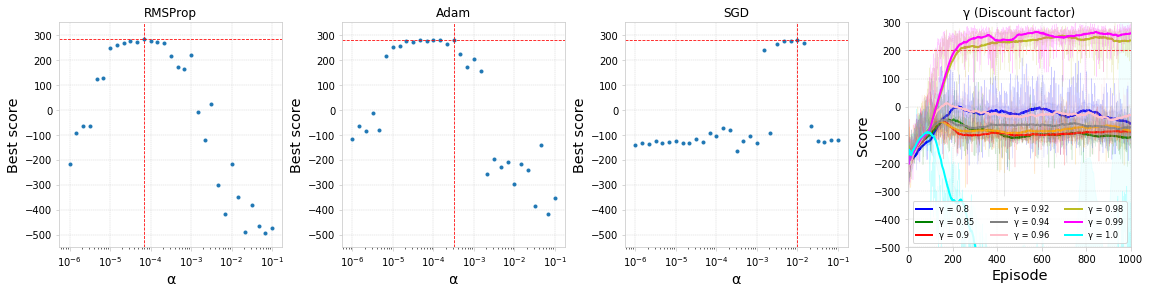

In [687]:
import json

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

experiment_name = 'e5a_final'
protocol_filename = f'{base_dir}/{experiment_name}/protocol.json'
with open(protocol_filename, 'r') as f:
    protocol = json.load(f)
    
alphas = []
for i, experiment in enumerate(protocol['experiments']):
    alphas.append(experiment['alpha'])
    
df = pd.DataFrame(index=alphas, columns=['RMSProp', 'Adam', 'SGD'])
for i, experiment in enumerate(protocol['experiments']):
    data = []
    for j, folder in enumerate(['e5a_final', 'e5b_final', 'e5c_final']):
        df_e = load_experiment_df(f'{base_dir}/{folder}/df_{experiment["id"]}.csv')
        data.append(df_e['average'][-500:].max())
                                  
    df.loc[experiment['alpha']] = data

for c in df.columns:
    df[c] = pd.to_numeric(df[c])
                                  
def plot_alphas(optimizer, ax):
    ax.plot(df[optimizer], '.')
    ax.set_xscale('log')
    format_axis(ax, xlabel='α', ylabel='Best score')
    ax.axhline(df[optimizer].max(), color='red', linewidth=0.8, linestyle='--')
    ax.axvline(df[optimizer].idxmax(), color='red', linewidth=0.8, linestyle='--')
    ax.set_ylim(-550, 350)
    ax.set_title(optimizer)
                                  
plot_alphas('RMSProp', ax1)
plot_alphas('Adam', ax2)
plot_alphas('SGD', ax3)
                                  
                                  
# Gamma
colors = ['blue', 'green', 'red', 'orange', 'grey', 'pink', 'tab:olive', 'magenta', 'cyan']
gammas = [0.8, 0.85, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99, 1.0]
for i, eid in enumerate(string.ascii_letters[0:9].upper()):
    df = load_experiment_df(f'{base_dir}/e3c_final/df_{eid}.csv')

    plot_experiment(df, ax4, colors[i], alpha_score=0.2, alpha_std=0.05, show_vline=False, label=f'γ = {gammas[i]}',
                    show_hline=True if i == 0 else False)
    #frames.append(df_test['score_mean'])
    #means.append(df_test['score_mean'].mean())

ax4.set_ylim(-500, 300)
ax4.set_xlim(0, 1000)
format_axis(ax4)
ax4.legend(ncol=3, loc=4, prop={'size': 8.2})
ax4.set_title('γ (Discount factor)')


#plt.subplots_adjust(left=0.07, right=0.98, top=0.97, bottom=0.15, wspace=0.27)
plt.subplots_adjust(left=0.05, right=0.98, top=0.93, bottom=0.15, wspace=0.27)
plt.savefig('paper/images/fig3.png')

In [669]:
df.max()

RMSProp    281.727425
Adam       281.227500
SGD        277.733431
dtype: float64

In [670]:
df.idxmax()

RMSProp    0.000068
Adam       0.000316
SGD        0.010000
dtype: float64

## Figure 4: Gamma

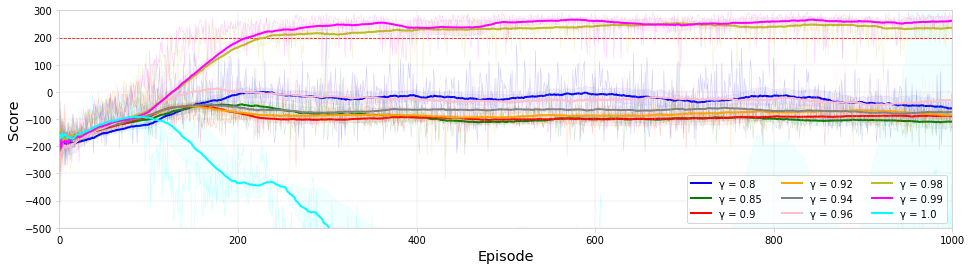

In [672]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 4))

colors = ['blue', 'green', 'red', 'orange', 'grey', 'pink', 'tab:olive', 'magenta', 'cyan']
gammas = [0.8, 0.85, 0.9, 0.92, 0.94, 0.96, 0.98, 0.99, 1.0]
for i, eid in enumerate(string.ascii_letters[0:9].upper()):
    df = load_experiment_df(f'{base_dir}/e3c_final/df_{eid}.csv')

    plot_experiment(df, ax1, colors[i], alpha_score=0.2, alpha_std=0.05, show_vline=False, label=f'γ = {gammas[i]}',
                    show_hline=True if i == 0 else False)
    #frames.append(df_test['score_mean'])
    #means.append(df_test['score_mean'].mean())

ax1.set_ylim(-500, 300)
ax1.set_xlim(0, 1000)
format_axis(ax1)
ax1.legend(ncol=3, loc=4)

plt.savefig('paper/images/fig4.png')

## Figure 5: Exploration strategies

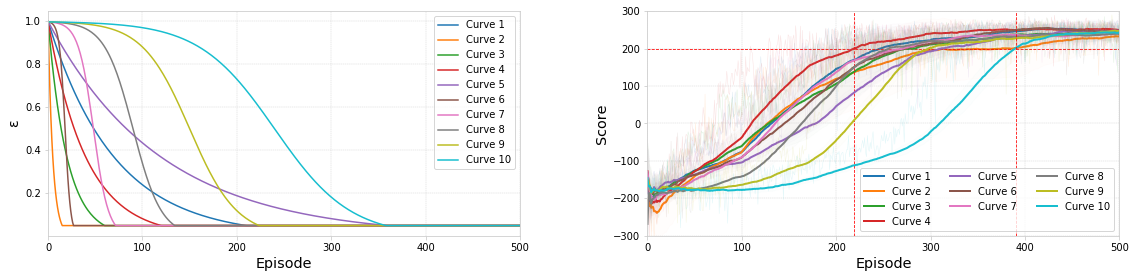

In [708]:
from epsilon_curves import get_epsilon_decay

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

#colors = ['blue', 'green', 'red', 'orange', 'grey', 'pink', 'tab:olive', 'magenta', 'cyan']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']
df = load_experiment_df(f'{base_dir}/e1c_final/df_A.csv')
plot_experiment(df, ax2, colors[0], alpha_score=0.13, alpha_std=0.01, show_vline=False, label=f'Curve 1',
                show_hline=True if i == 0 else False)

for i, eid in enumerate(string.ascii_letters[0:9].upper()):
    df = load_experiment_df(f'{base_dir}/e4_final/df_{eid}.csv')

    plot_experiment(df, ax2, colors[i + 1], alpha_score=0.13, alpha_std=0.01, show_vline=True if i in [2,8] else False, 
                    label=f'Curve {i + 2}',
                    show_hline=True if i == 0 else False)
    


ax2.set_ylim(-300, 300)
ax2.set_xlim(0, 500)
format_axis(ax2)
ax2.legend(ncol=3, loc=4)

x = np.linspace(0, 1000, 1000)
for i in range(10):
    y = [get_epsilon_decay(decay_function=i)(0, xs) for xs in x]
    ax1.plot(x, y, label=f'Curve {i + 1}')

ax1.set_xlim(0, 500)
ax1.legend()
format_axis(ax1, ylabel='ε')

plt.subplots_adjust(left=0.05, right=0.98, top=0.93, bottom=0.15, wspace=0.27)
plt.savefig('paper/images/fig4.png')

In [710]:
points = dict()

df = load_experiment_df(f'{base_dir}/e1c_final/df_A.csv')
label = f'Curve 1'
hit = df[df['average_mean'] > 200].iloc[0].name
points[label] = hit
    
for i, eid in enumerate(string.ascii_letters[0:9].upper()):
    df = load_experiment_df(f'{base_dir}/e4_final/df_{eid}.csv')
    label = f'Curve {i + 2}'
    hit = df[df['average_mean'] > 200].iloc[0].name
    points[label] = hit
    
print(points)

{'Curve 1': 247, 'Curve 2': 375, 'Curve 3': 278, 'Curve 4': 219, 'Curve 5': 312, 'Curve 6': 274, 'Curve 7': 271, 'Curve 8': 256, 'Curve 9': 298, 'Curve 10': 390}


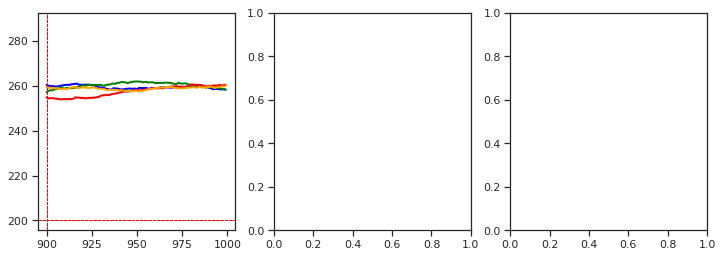

In [318]:
#dfA = load_experiment_df(f'{base_dir}/e1b/df_A.csv')
#dfB = load_experiment_df(f'{base_dir}/e1b/df_B.csv')
#dfC = load_experiment_df(f'{base_dir}/e1b/df_C.csv')
#dfD = load_experiment_df(f'{base_dir}/e1b/df_D.csv')
#dfE = load_experiment_df(f'{base_dir}/e1b/df_E.csv')
#dfF = load_experiment_df(f'{base_dir}/e1b/df_F.csv')
#dfG = load_experiment_df(f'{base_dir}/e1b/df_G.csv')


#a = 0#-100
#plot_experiment(dfA[a:], ax1, 'blue', alpha_score=0, alpha_std=0, show_vline=False, show_hline=True)
#plot_experiment(dfB[a:], ax1, 'green', alpha_score=0, alpha_std=0, show_vline=False, show_hline=False)
#plot_experiment(dfC[a:], ax1, 'red', alpha_score=0, alpha_std=0, show_vline=False, show_hline=False)
#plot_experiment(dfD[a:], ax1, 'orange', alpha_score=0, alpha_std=0, show_vline=False, show_hline=False)
#plot_experiment(dfE[a:], ax1, 'grey', alpha_score=0, alpha_std=0, show_vline=False, show_hline=False)
#plot_experiment(dfF[a:], ax1, 'pink', alpha_score=0, alpha_std=0, show_vline=False, show_hline=False)
#plot_experiment(dfG[a:], ax1, 'tab:olive', alpha_score=0, alpha_std=0, show_vline=False, show_hline=False)


dfA = load_experiment_df(f'{base_dir}/e1b/df_A.csv')
dfB = load_experiment_df(f'{base_dir}/e1b/df_B.csv')
dfF = load_experiment_df(f'{base_dir}/e1b/df_C.csv')
dfG = load_experiment_df(f'{base_dir}/e1b/df_D.csv')
dfH = load_experiment_df(f'{base_dir}/e1b/df_E.csv')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
a=-100
plot_experiment(dfA[a:], ax1, 'blue', alpha_score=0, alpha_std=0.0005)
plot_experiment(dfB[a:], ax1, 'green', alpha_score=0, alpha_std=0.0005)
plot_experiment(dfF[a:], ax1, 'red', alpha_score=0, alpha_std=0.0005)
plot_experiment(dfG[a:], ax1, 'orange', alpha_score=0, alpha_std=0.0005)
#plot_experiment(dfH[a:], ax1, 'grey', alpha_score=0, alpha_std=0.0005)
#ax1.set_xlim(0, 300)

In [188]:
# compare samples
stat, p = ttest_ind(dfA['score_mean'][-100:], dfB['score_mean'][-100:])
print('Statistics=%.3f, p=%.8f' % (stat, p))
# interpret
alpha = 0.005
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-2.692, p=0.00771117
Same distributions (fail to reject H0)


In [189]:
dfA['score_mean'][-100:].describe()

count    100.000000
mean     256.561000
std       21.645719
min      191.000000
25%      245.450000
50%      262.550000
75%      273.325000
max      289.900000
Name: score_mean, dtype: float64

In [190]:
dfB['score_mean'][-100:].describe()

count    100.000000
mean     264.143000
std       18.020618
min      203.200000
25%      256.700000
50%      269.550000
75%      275.600000
max      286.400000
Name: score_mean, dtype: float64

In [713]:
def combine_experiment_runs(experiment_folder, experiment_id, runs, df_filename):
    def load_experiment_df(filename, suffix):
        return pd.read_csv(filename, dtype={'episode': int},
                           index_col=0).add_suffix(suffix)

    frames = [load_experiment_df(f'{experiment_folder}/df_{experiment_id}_run_{x + 1:02d}_test.csv',
                                 suffix=f'_{x + 1:02d}') for x in range(runs)]
    df = pd.concat(frames, axis=1)

    def column_list(variable, runs):
        return [f'{variable}_{x + 1:02d}' for x in range(runs)]

    columns = []
    for variable in ['score', 'average', 'avg_q_values']:
        df[f'{variable}_mean'] = df[column_list(variable, runs)].mean(axis=1)
        df[f'{variable}_std'] = df[column_list(variable, runs)].std(axis=1)
        columns.extend((f'{variable}_mean', f'{variable}_std'))

    df = df[columns]
    df['rolling_100_score'] = df['score_mean'].rolling(100, min_periods=1).mean()
    df.to_csv(df_filename)

In [714]:
import string

full_experiment_folder = f'{base_dir}/e1b_final'

for eid in string.ascii_letters[0:8].upper():
    combine_experiment_runs(full_experiment_folder, eid, 20, df_filename=f'{full_experiment_folder}/df_{eid}_test.csv')
    


In [433]:
def combine_experiment_tests(experiment_folder, experiment_id, runs):
    frames = [load_experiment_df(f'{experiment_folder}/df_{experiment_id}_run_{x + 1:02d}_test.csv') #[-500:] 
              for x in range(runs)]
    return pd.concat(frames)

runs = 20
df = combine_experiment_tests('experiments/e1b', 'B', runs)
df2 = combine_experiment_tests('experiments/e1b', 'G', runs)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
#_ = ax1.hist(df['score'], bins=200)
#_ = ax2.hist(df2['score'], bins=200)
print(df['score'].describe())
print(' ')
print(df2['score'].describe())
print(' ')

# https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/
from scipy.stats import ttest_ind, ttest_rel

# compare samples
stat, p = ttest_ind(df['score'], df2['score'])
print('Statistics=%.3f, p=%.8f' % (stat, p))
# interpret
alpha = 0.01
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

count    2000.000000
mean      251.691000
std        73.222744
min      -488.000000
25%       250.000000
50%       268.000000
75%       284.000000
max       322.000000
Name: score, dtype: float64
 
count    2000.000000
mean      252.907000
std        76.356621
min      -598.000000
25%       253.000000
50%       272.000000
75%       286.000000
max       324.000000
Name: score, dtype: float64
 
Statistics=-0.514, p=0.60725271
Same distributions (fail to reject H0)


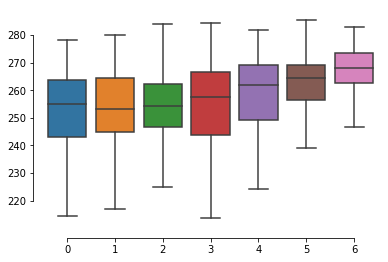

In [432]:
import seaborn as sns
#sns.set(style="ticks", palette="pastel")
#sns.reset_orig()

dfA = load_experiment_df(f'{base_dir}/e1b/df_A_test.csv')
dfB = load_experiment_df(f'{base_dir}/e1b/df_B_test.csv')
dfC = load_experiment_df(f'{base_dir}/e1b/df_C_test.csv')
dfD = load_experiment_df(f'{base_dir}/e1b/df_D_test.csv')
dfE = load_experiment_df(f'{base_dir}/e1b/df_E_test.csv')
dfF = load_experiment_df(f'{base_dir}/e1b/df_F_test.csv')
dfG = load_experiment_df(f'{base_dir}/e1b/df_G_test.csv')

col = 'score_mean'
frames = [dfB[col], dfG[col], dfD[col], dfC[col], dfA[col], dfF[col], dfE[col]]

# Draw a nested boxplot to show bills by day and time
sns.boxplot(data=frames, showfliers=False)
sns.despine(offset=10, trim=True)


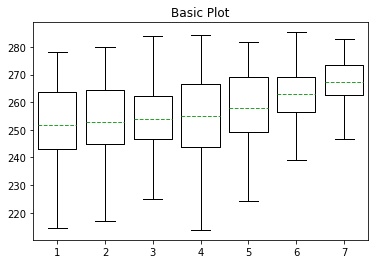

In [442]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
_ = ax1.boxplot(frames, notch=False, widths=0.8, showfliers=False, meanline=True, showmeans=True, medianprops={'linewidth': 0})



In [427]:
for df in frames:
    print(df.mean())

251.69099999999983
252.907
253.7740000000001
255.0084999999999
257.72450000000003
262.7905
267.3309999999999
